# DAT 341: Assignment 3 (2024)

**(45 marks)**

**Instructions**

Add the following information to your notebook name before you submit:

*  Your Student number

*  Your Surname

*  Your Initials

Please complete all the questions below on this Google Notebook.

Add code cells as needed.

**Make use of comments within your coding cells to document your code at each step (#).**

After completion, download the ipynb file and submit it using the assignment link on SunLearn.

Submission deadline: 20 October 2024, before 20:00

In [ ]:
 #23563036 M.Badrodin (Muktaar Badrodin)

In [2]:
from datascience import *
import numpy as np
from google.colab import files
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Question 1:**

(23 marks in total)

**Crop yield comparison between precision agriculture and traditional methods**

Precision agriculture, which involves the use of modern technologies such as GPS, drones, and sensors, is believed to increase crop yield and improve farming efficiency. On the other hand, traditional farming methods, which rely more on manual labor and conventional tools, remain widely practiced. As part of a study to assess the impact of precision agriculture on crop yield, you are tasked with analysing and comparing data from farms using these two different approaches.

The study was conducted on multiple farms, where half of the farms used precision agriculture techniques, and the other half followed traditional farming methods. The results were recorded over one growing season, and the crop yield (in tons) was measured.

The data is captured in a file called crop_yield_data.csv, which contains the following columns:

* Farm ID: A unique identifier for each farm.
* Method: The farming method used (either "Precision" or "Traditional").
* Area: The area of the farm in hectares.
* Yield: The total crop yield in tons.


In [3]:
# upload file
uploaded = files.upload()

Saving precision_farming.csv to precision_farming.csv


In [4]:
# read file into table
farming = Table.read_table('precision_farming.csv')
farming

level_0,index,Farm ID,Method,Area (hectares),Yield (tons)
0,1,Farm_1,Traditional,43,192.008
1,2,Farm_2,Traditional,33,143.183
2,3,Farm_3,Traditional,19,82.6352
3,4,Farm_4,Traditional,47,192.08
4,5,Farm_5,Traditional,12,51.9737
5,6,Farm_6,Traditional,25,103.014
6,7,Farm_7,Traditional,43,168.384
7,8,Farm_8,Traditional,23,105.395
8,9,Farm_9,Traditional,27,104.682
9,10,Farm_10,Traditional,15,54.2275


a) Assuming you are comparing crop yield per hectare for the different farming methods, what is your hypothesis? (1 mark)

In [ ]:
#Answer in the textbox below

#The null hypothesis is that there is no significant difference in terms of crop yield per hectare between the farms that makes use of precision agriculture and the farms that make use of traditional farming methods.
# Any difference found is not significant and is purely by chance.

#The alternative hypothesis is that there is a significant difference in terms of crop yield per hectare between the farms that makes use of precision agriculture and the farms that make use of traditional farming methods.
# Difference found between the two methods is significant and is not solely due to chance.

The null hypothesis is that there is no significant difference in terms of crop yield per hectare between the farms that makes use of precision agriculture and the farms that make use of traditional farming methods. Any difference found is not significant and is purely by chance.

The alternative hypothesis is that there is a significant difference in terms of crop yield per hectare between the farms that makes use of precision agriculture and the farms that make use of traditional farming methods. Difference found between the two methods is significant and is not solely due to chance.

b) Determine the crop yield per hectare for each farm, then make use of A/B testing and 1000 simulations to determine at a 95% confidence level if precision agriculture techniques have a significant impact on crop yield per hectare compared to traditional farming practices. (20 marks)

In [5]:
# look at the groups
farming.group('Method')

Method,count
Precision,100
Traditional,100


In [6]:
#indication of distribution
#Note yield tons is already numerical in nature, no need to change it to numerical again
#.pivot(x=Method,y=Yield (tons))
farming.pivot("Method","Yield (tons)")

Yield (tons),Precision,Traditional
17.6213,0,1
17.772,1,0
18.8561,1,0
20.3349,1,0
20.9428,0,1
21.2049,0,1
23.8205,0,1
23.9179,0,1
24.4706,1,0
25.1854,1,0


In [7]:
#Remember they wanted Yield (tons) per hectare so you would need to divide it up first.
#Let us define a function to do just that.
def yield_per_hectare(Yield_tons,hectare):
  return Yield_tons/hectare

In [8]:
#name_of_table.apply(function, column1 arguement, column2 arguement)
farming_table=farming.apply(yield_per_hectare,"Yield (tons)","Area (hectares)")
farming_table
completed_table=farming.with_column("yield per hectare",farming_table)   # New applied table added to the original table
completed_table

level_0,index,Farm ID,Method,Area (hectares),Yield (tons),yield per hectare
0,1,Farm_1,Traditional,43,192.008,4.46529
1,2,Farm_2,Traditional,33,143.183,4.33888
2,3,Farm_3,Traditional,19,82.6352,4.34922
3,4,Farm_4,Traditional,47,192.08,4.0868
4,5,Farm_5,Traditional,12,51.9737,4.33114
5,6,Farm_6,Traditional,25,103.014,4.12056
6,7,Farm_7,Traditional,43,168.384,3.9159
7,8,Farm_8,Traditional,23,105.395,4.58238
8,9,Farm_9,Traditional,27,104.682,3.87713
9,10,Farm_10,Traditional,15,54.2275,3.61517


In [9]:
# works out average
means_table=completed_table.select("Method","yield per hectare").group("Method",np.average)
means_table

Method,yield per hectare average
Precision,4.11622
Traditional,4.02206


In [10]:
#makes it into an array
means=means_table.column(1)
means

array([ 4.11621858,  4.02206356])

In [11]:
#working out observed difference
#item selects element in array. (1)=> second element  (0)=> first element
observed_difference=means.item(1)-means.item(0)
observed_difference


-0.09415501558934913

In [12]:
# function to calculate the difference in averages
#original table, numerical value, categorical value
#yield per hectare is the numerical value and Method is cat_value
def difference_of_means(org_table,num_value,cat_value):
  new_means_table=org_table.select(num_value,cat_value).group(cat_value,np.average)
  new_means=new_means_table.column(1)
  return new_means.item(1)-new_means.item(0)  #could also ran into a value.

In [13]:
# test the function
difference_of_means(completed_table,"yield per hectare","Method")

-0.09415501558934913

In [14]:
#shuffle categories
Shuffle_categories=completed_table.sample(with_replacement=False)
Shuffle_categories

level_0,index,Farm ID,Method,Area (hectares),Yield (tons),yield per hectare
50,51,Farm_51,Traditional,11,54.6981,4.97256
95,96,Farm_96,Traditional,48,214.235,4.46323
69,70,Farm_70,Traditional,40,181.316,4.5329
131,132,Farm_32,Precision,32,136.752,4.27349
89,90,Farm_90,Traditional,5,17.6213,3.52426
130,131,Farm_31,Precision,46,245.487,5.33667
26,27,Farm_27,Traditional,26,107.869,4.14883
179,180,Farm_80,Precision,49,235.234,4.80069
197,198,Farm_98,Precision,28,108.116,3.86129
192,193,Farm_93,Precision,13,46.0986,3.54604


In [15]:
#shuffle categories and also make use of the .column function in relation to methods
Shuffle_categories=completed_table.sample(with_replacement=False).column("Method")
Shuffle_categories    #Now you have an array of Precision and Traditional

array(['Precision', 'Traditional', 'Traditional', 'Traditional',
       'Precision', 'Precision', 'Traditional', 'Precision', 'Traditional',
       'Traditional', 'Traditional', 'Precision', 'Traditional',
       'Traditional', 'Traditional', 'Precision', 'Precision',
       'Traditional', 'Precision', 'Traditional', 'Traditional',
       'Precision', 'Precision', 'Precision', 'Precision', 'Traditional',
       'Precision', 'Traditional', 'Traditional', 'Precision', 'Precision',
       'Precision', 'Traditional', 'Precision', 'Precision', 'Precision',
       'Traditional', 'Traditional', 'Precision', 'Traditional',
       'Precision', 'Precision', 'Precision', 'Traditional', 'Precision',
       'Traditional', 'Precision', 'Precision', 'Precision', 'Precision',
       'Precision', 'Traditional', 'Traditional', 'Precision', 'Precision',
       'Precision', 'Precision', 'Precision', 'Traditional', 'Traditional',
       'Precision', 'Traditional', 'Traditional', 'Traditional',
       'Prec

In [16]:
# add it to the table
original_and_shuffled=completed_table.with_column("Shuffled_Method",Shuffle_categories)
original_and_shuffled

level_0,index,Farm ID,Method,Area (hectares),Yield (tons),yield per hectare,Shuffled_Method
0,1,Farm_1,Traditional,43,192.008,4.46529,Precision
1,2,Farm_2,Traditional,33,143.183,4.33888,Traditional
2,3,Farm_3,Traditional,19,82.6352,4.34922,Traditional
3,4,Farm_4,Traditional,47,192.08,4.0868,Traditional
4,5,Farm_5,Traditional,12,51.9737,4.33114,Precision
5,6,Farm_6,Traditional,25,103.014,4.12056,Precision
6,7,Farm_7,Traditional,43,168.384,3.9159,Traditional
7,8,Farm_8,Traditional,23,105.395,4.58238,Precision
8,9,Farm_9,Traditional,27,104.682,3.87713,Traditional
9,10,Farm_10,Traditional,15,54.2275,3.61517,Traditional


In [17]:
# calculate diff in mean for shuffled data

#yield per hectare is the numerical value while Shuffled_Method is catagorical
difference_of_means(original_and_shuffled,"yield per hectare","Shuffled_Method")

-0.00503820402492039

In [18]:
# show observed difference in mean
observed_difference

-0.09415501558934913

In [19]:
# function to generate in simmulated diff in mean
def one_simulated_difference(table,num_value,cat_value):
  new_shuffled_categories=table.sample(with_replacement=False).column(cat_value)
  new_shuffled_table=table.with_column("Shuffled_Method",new_shuffled_categories)
  return difference_of_means(new_shuffled_table,num_value,"Shuffled_Method")

In [20]:
one_simulated_difference(completed_table,"yield per hectare","Method")

-0.0831227821861047

In [21]:
# simulate many differences
#we need an array than we can turn into a table
#lets do 1000 with a 95% confidence interval
difference=make_array()
for i in np.arange(1000):
  new_diff=one_simulated_difference(completed_table,"yield per hectare","Method")
  difference=np.append(difference,new_diff)

In [22]:
#Output the difference
difference

array([ -1.29483146e-01,  -1.24726165e-01,   3.33636745e-02,
         9.65630526e-02,   8.70191452e-02,  -2.76796546e-03,
        -5.02050835e-02,  -1.12116260e-01,   1.33702810e-03,
         1.81566014e-02,   6.25790289e-02,   2.96149909e-02,
        -1.82191909e-02,   5.68123987e-05,   1.07680561e-01,
         8.51162248e-02,  -4.06980363e-02,   5.06052734e-02,
         1.62786633e-02,  -3.52155766e-02,   5.37477238e-02,
        -2.71683016e-02,  -2.62833287e-04,   1.26669883e-02,
        -5.46011437e-02,  -8.69332194e-02,   1.38476335e-02,
         4.78089173e-02,   7.94477307e-02,   1.27280303e-01,
         2.51726124e-02,  -3.99509447e-02,  -1.40944053e-01,
        -6.01958153e-02,   3.74586265e-02,   9.40340517e-02,
        -1.18652505e-01,   2.45607234e-02,  -8.54221202e-02,
         3.17489122e-02,   1.73067314e-03,  -2.46764741e-02,
         6.70661288e-02,   3.48464975e-03,  -8.93083154e-02,
        -9.52472318e-02,  -6.67320104e-02,  -2.06119207e-02,
         9.51795760e-02,

Observed Difference:-0.09415501558934913


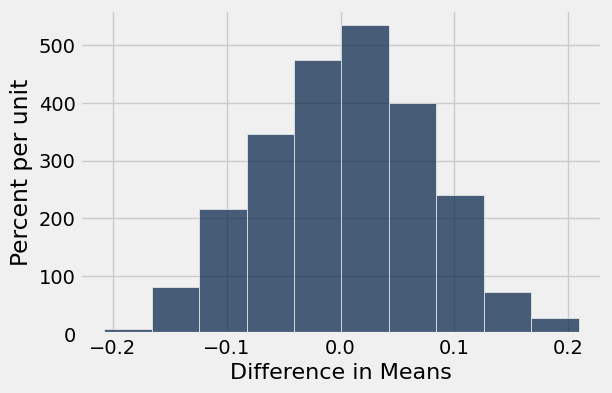

In [23]:
# look at the distribution
#remember observed_difference is numerical you have to change it into a string
print("Observed Difference:"+ str(observed_difference))
Table().with_column("Difference in Means",difference).hist()

Observed Difference:-0.09415501558934913


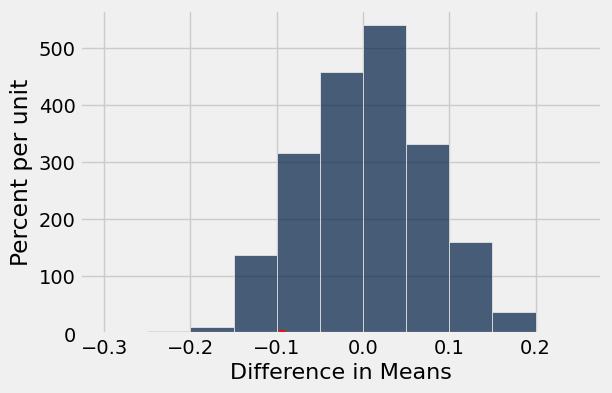

In [24]:
#(start,stop,increment at)
test_bins=np.arange(-0.3,0.3,0.05)
test_bins

# look at the distribution
#remember observed_difference is numerical you have to change it into a string
print("Observed Difference:"+ str(observed_difference))
Table().with_column("Difference in Means",difference).hist(bins=test_bins)
plots.scatter(observed_difference,0,color="red",s=40)

In [25]:
difference>=observed_difference

array([False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [26]:
sum(difference>=observed_difference)

908

In [27]:
#This will give us the percentage

#Remember we working with a 95% confidence interval
100*sum(difference>=observed_difference)/1000

90.799999999999997

c) Discuss your conclusion(s) on your tested hypothesis. (3 marks)




In [ ]:
#Answer in textbox below.

#We fail to reject the null hypothesis. Since the confidence interval is 95% and the percentage we obtained is 90.80%, there is no significant difference between the farming methods (precision and traditional).
#Hence any difference found between the two methods is purely due to chance.

We fail to reject the null hypothesis. Since the confidence interval is 95% and the percentage we obtained is 90.80%, there is no significant difference between the farming methods (precision and traditional). Hence any difference found between the two methods is purely due to chance.

## **Question 2**:

(22 marks in total)




You want to generate test data to practice specific A\B testing (such as the table below just with more instances). The group ID's are either 'A' or 'B' and the outcomes are either '+' or '-'.


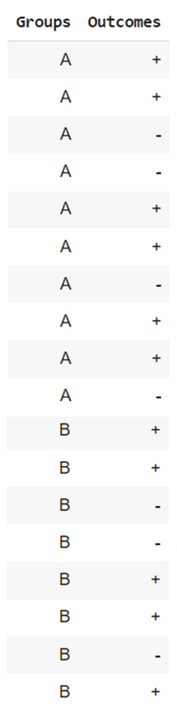

(You can make use of the following code cell to test your functions)

In [28]:
# exxample input
A_out1_prop = 0.5     # proportion of outcome 1 ('+') in group A
B_out1_prop = 0.7     # proportion of outcome 1 ('+') in group B
group_size = 750      # number of instances per group
outcome_ops = make_array('+','-') # array with the two possible outcomes
groups = make_array('A','B')      # array with the two possible group IDs

To generate a data set (table above) write the following code:

a) Create a function called group_data. This function must take three inputs:

* the number of instances belonging to each group, *group_size* in the code above (assume the two groups have an equal number of instances).

* the proportion of your first outcome (for example the proportion of chickens that are infected). *A_out1_prop* **or** *B_out1_prop* in the code above.

* an array of your two outcomes (for example and array with the elements ‘+’ and ‘-’, for infected and non-infected respectively. *outcome_ops* in the code above.

The function must then:

 * generate an array (called *out_props*) with both proportion (that of the first outcome and that of the second outcome).

* make use of the function sample_proportions to sample form this array of proportion the same number of times as the umber of instances in the group. Store these proportions in a new array called *new_props*.

* generate an empty array (called *group_outcomes*) to store the outcome values for the group.

* make use of iteration to add outcome 1 (for example ‘+’) to the *group_outcomes* array, X number of times, where X = group size multiplied by the proportion of outcome 1. HINT, make use of the total number of instances in a group, the array of new proportions generated above (*new_props*) as well as the array of outcomes (given as input for the function).

* make use of iteration to add outcome 2 (for example ‘-’) to the *group_outcomes* array X number of times, where X = group size multiplied by the proportion of outcome 1. HINT, make use of the the total number of instances in a group, the array of new proportions generated above (*new_props*) as well as the array of outcomes (given as input for the function).

* randomly shuffle the *group_outcomes* array, and finally.

* return the shuffled *group_outcomes* array.

(10 marks)

In [101]:
def group_data(group_size, out1_prop,outcome_ops):
  out_props=np.array([out1_prop,1-out1_prop])   #array with proportion of each outcome made
  new_props=sample_proportions(group_size,out_props)    #sample_proportions will generate new proportions
  group_outcomes=np.array([])   #empty array to store outcomes
  for i in np.arange(group_size*out1_prop):
    group_outcomes=np.append(group_outcomes,'+')
  for i in np.arange(group_size*(1-out1_prop)):
    group_outcomes=np.append(group_outcomes,'-')
  table=Table().with_column("Outcomes",group_outcomes)
  group_outcomes=table.sample(with_replacement=False).column("Outcomes")
  #np.random.shuffle(group_outcomes)  #randomly shuffling the array
  return group_outcomes   #returns the group_outcomes array


In [102]:
#testing if the function works
group_data(group_size, B_out1_prop, outcome_ops)

array(['+', '+', '+', '+', '+', '+', '-', '+', '-', '-', '+', '+', '-',
       '-', '+', '-', '+', '+', '+', '+', '-', '+', '+', '+', '+', '+',
       '+', '+', '+', '-', '-', '-', '-', '-', '+', '-', '+', '+', '-',
       '+', '-', '-', '-', '+', '+', '-', '+', '+', '+', '+', '-', '-',
       '+', '-', '+', '+', '+', '+', '+', '-', '+', '-', '+', '-', '-',
       '+', '-', '+', '+', '-', '-', '-', '-', '+', '+', '+', '-', '+',
       '+', '+', '+', '+', '-', '-', '-', '+', '+', '-', '+', '-', '+',
       '+', '-', '-', '-', '-', '-', '+', '+', '+', '-', '+', '-', '+',
       '+', '-', '+', '-', '+', '-', '-', '+', '+', '-', '+', '+', '+',
       '+', '+', '+', '+', '-', '+', '+', '-', '+', '-', '+', '-', '+',
       '+', '-', '+', '-', '+', '+', '+', '+', '+', '+', '-', '+', '-',
       '+', '-', '-', '+', '-', '+', '+', '+', '+', '+', '-', '+', '-',
       '-', '+', '-', '+', '+', '+', '-', '-', '+', '+', '+', '+', '+',
       '+', '+', '+', '+', '+', '+', '-', '-', '+', '+', '+', '+

b) Create a second function called *make_data*. This function takes 5 inputs:

* the number of instances belonging to each group (assume the two groups have an equal number of instances.

* the proportion of outcome 1 that you want in group A.

* the proportion of outcome 1 that you want in group B.

* an array of your two groups id’s (for example and array with the elements ‘A’ and ‘B’).

* an array of your two outcomes (for example and array with the elements ‘+’ and ‘-’).

The function must then:

* generate two arrays with the outcomes for two groups (for example group A and group B) respectively, using the function created in (a) above. Then append the second one to the first (for example append group B’s outcomes to that of group A).

* generate two arrays with the group id for each group respectively. For example an array with x elements each with the value of ‘A’ and another array with x elements each with the value of ‘B’. Then append the second one to the first (for example append group B’s id’s to that of group A).

* Finally, combine the arrays into a table, with the headings “Groups” and “Outcomes” with their respected values generated above, and return this table.

(10 marks)

In [103]:
#A function called make_data was created.

#The inputs were those of the group size, the proportion outcome 1 for group A and for group B, group id array and outcome array
def make_data(group_size, A_out1_prop, B_out1_prop, groups, outcome_ops):
  group_A=group_data(group_size, A_out1_prop, outcome_ops)
  group_B=group_data(group_size, B_out1_prop, outcome_ops)   #two arrays were made for the outcomes of the two groups
  group_outcomes=np.append(group_A,group_B)
  groups=([])  #empty array created.

  for i in np.arange(len(group_A)):
    groups=np.append(groups,'A')   #took the length of the groups.
  for i in np.arange(len(group_B)):
    groups=np.append(groups,'B')   #make sure to append.

  table=Table().with_columns("Groups",groups,"Outcomes",group_outcomes)
  return table


c) Test you functions by running following code: ( 1 mark)

In [104]:
A_out1_prop = 0.5     # proportion of outcome 1 ('+') in group A
B_out1_prop = 0.7     # proportion of outcome 1 ('+') in group B
group_size = 750      # number of instances per group
outcome_ops = make_array('+','-') # array with the two possible outcomes
groups = make_array('A','B')      # array with the two possible group IDs

final_data = make_data(group_size, A_out1_prop, B_out1_prop, groups, outcome_ops)
final_data

Groups,Outcomes
A,+
A,+
A,-
A,-
A,-
A,-
A,+
A,-
A,+
A,+


d) Create a pivot table of you table generate in (c). ( 1 mark)

In [105]:
#A pivot table was created from the results of the previous table generated
#Remember outcomes first, you want to count the + and - in each respective group.
final_table=final_data.pivot("Outcomes",'Groups')
final_table  #Output the pivot table

Groups,+,-
A,375,375
B,525,226
